# **SIMULATING A INCIDENT RESPONSE SCENARIO**

The following python notebook shows and basic example of how our chosen NIDS implementation would function.

In order to replicate a real scenario, I made the following adjustments:


*   Input 'simulated_data' contains much less instances where an intrusion had in fact occured. This is as, compared to the training and testing datasets, in real scenarios, the ratio of normal network activity to abnormal activity is much higher.
*   The classifiers were placed into python classes (intrustion_model.py & attack_type_model.py) as to enable a more cohesive and customisable structure.
*   Implemented a optimisation/retraining implementation with the classifiers (within the python classes).




In [ ]:
#IMPORT NECCESSARY PACKAGES#
from google.colab import drive
import pandas as pd
import time
drive.mount('/content/drive/')

#IMPORT DATASETS PREVIOUSLY EXPORTED FROM classifiers.ipynb FOR intrusion_model.py#
x_train = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/x_train.csv")
x_train = x_train.drop('Unnamed: 0',axis=1)
#display(x_train)
y_train = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/y_train.csv")
y_train = y_train.drop('Unnamed: 0',axis=1)
#display(y_train)
x_test = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/x_test.csv")
x_test = x_test.drop('Unnamed: 0',axis=1)
#display(x_test)
y_test = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/y_test.csv")
y_test = y_test.drop('Unnamed: 0',axis=1)
#display(y_test)

#IMPORT ATTACK CLASS TRAINING DATA#
x_train_class = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/x_train_class.csv")
x_train_class = x_train_class.drop('Unnamed: 0',axis=1)
y_train_class = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/y_train_class.csv")
y_train_class = y_train_class.drop('Unnamed: 0',axis=1)

#IMPORT ATTACK CLASS TEST DATA#
x_test_class = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/x_test_class.csv")
x_test_class = x_test_class.drop('Unnamed: 0',axis=1)
y_test_class = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/y_test_class.csv")
y_test_class = y_test_class.drop('Unnamed: 0',axis=1)

#IMPORT SIMULATION DATASET FROM classifiers.ipynb TO BE USED AS SIMULATION ALGORITHM INPUT#
simulation_data = pd.read_csv("/content/drive/My Drive/DISSERTATION/simulation/simulation_data.csv")
simulation_data = simulation_data.drop('Unnamed: 0',axis=1)
#display(simulation_data)


Mounted at /content/drive/


**ADJUSTING 'simulated_data.csv' TO HAVE LESS ABNORMAL/INTRUSION SAMPLES**

In the following code I split the imported simulation_data.csv into abnormal incident traffic simulation_data_inc and normal traffic simulation_data_norm

The number of abnormal traffic is limited to 500 samples and then rejoined to the normal traffic dataset. For extended randomness, the joined dataset (renamed simulation_data once again and then the rows shuffled.

In [ ]:
#SELECTS ALL INCIDENT/ABNORMAL TRAFFIC DATA ROWS#
simulation_data_inc = simulation_data[simulation_data.attack_occur == 1]

#SELECTS ALL NORMAL TRAFFIC DATA ROWS#
simulation_data_norm = simulation_data[simulation_data.attack_occur == 0]

#CONCATENATES BOTH THE NORMAL TRAFFIC DATA AND THE NOW REDUCED ABNORMAL TRAFFIC DATASETS#
simulation_data = pd.concat([simulation_data_norm,simulation_data_inc.sample(500)],axis=0,ignore_index=True)

#MIXES UP ALL THE ROWS IN THE DATASET FOR A MORE RANDOM/REALISTIC FEED INTO THE NIDS#
simulation_data = simulation_data.sample(frac=1)

#SHOWS HOW MANY NORMAL VS ABNORMAL INSTANCES ARE IN THE simulation_data DATASET#
print("NORMAL VS ABNORMAL DATA ROWS (0=NORMAL, 1=ABNORMAL): \n"+ str(simulation_data['attack_occur'].value_counts()))
#simulation_data['attack_occur'].apply(pd.value_counts).plot(kind='pie',subplots=True)
simulation_data = simulation_data.drop('attack_occur',axis=1)

NORMAL VS ABNORMAL DATA ROWS (0=NORMAL, 1=ABNORMAL): 
0    5264
1     500
Name: attack_occur, dtype: int64


**IMPORTING NECCESARY PYTHON CLASSIFIER AND INCIDENT RESPONSE CLASSES**

The following classes were imported:


*   incident.py (/content/drive/MyDrive/DISSERTATION/simulation/utils/incident.py)
*   intrusion_model.py (/content/drive/MyDrive/DISSERTATION/simulation/utils/intrusion_model.py)
*   attack_type_model.py (/content/drive/MyDrive/DISSERTATION/simulation/utils/attack_type_model.py)



In [ ]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/DISSERTATION/simulation/utils')
%cd /content/drive/MyDrive/DISSERTATION/simulation/utils
from incident import Incident
from intrusion_model import IntrusionModel
from attack_type_model import AttackTypeModel

/content/drive/MyDrive/DISSERTATION/simulation/utils


**intrusion_model.py:** contains the IntrusionModel class which contains a DecisionTreeClassifier model. The class also contains a retrain() method to constantly allow the network operative to optimise the model in case of the false positive result.

**attack_type_model.py:** contains the AttackTypeModel class which also contains a DecisionTreeClassifier model. Similarly, the

**incident.py:** Encompasses methods to respond to the attack type identified by the attack_type_model.py classifier

# **TRAINING INTRUSION DETECTION MODELS**

Using the imported data from the classifies.ipynb, the two chosen classifier objects are instantiated and then trained using the train() method present in both of the classes.

In [ ]:
#INTRUSION DETECTION CLASSIFIER INSTANTIATION AND TRAINING#
intrusion_clf = IntrusionModel(x_train,y_train)
intrusion_clf.train()

#ATTACK TYPE DETECTION CLASSIFIER INSTANTIATION AND TRAINING#
#attack_clf = AttackTypeModel(x_train_inc,y_train_inc)
attack_clf = AttackTypeModel(x_train_class,y_train_class, x_test_class, y_test_class)
attack_clf.train()
#import incident

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# **SIMULATING THE INTRUSION DETECTION SYSTEM**

The simulation of the Intrusion Detection System works as follows:


1.   Processed data is fed into the algorithm as input row by row.
2.   Initially, the processed data is passed through the IntrusionModel to detect whether an intrusion had in fact occured.
3.   If an intrusion had in fact occured, the processed data is fed through the second layer AttackTypeModel classifier. This classifier determines what attack type had in fact occured. However, if an intrusion had not occured the loop continues iterating through the processed data rows.
4.   An Incident (incident.py) instance is then created, taking the network intrusion details and attack type as input. The respond() (incident.py) method is then used. This method cross-references with incident_response_library.py to
convert the LabelEncoder encoded number to be converted into the attack type name.
5.  The respond() function then presents the network operative with all the necessary information for them to determine whether the alert is a false positive. The network operative is presented with an input opportunity whereby, if the operative believe the alert to be false, they input 1 else 0.
6.  If 1 is input, the false positive data is sent to the retrain() function in the incident.py. In this function, the false positive data is concatenated to the previously existing training data and the classifier retrained. That way over time, the classifier will exponentially improve to eliminate false positives within its network context.
7.  After the simulation, the algorithm iterates through the intrusion_data array consisting of Incident objects, every incident that is Incident.false_positive = True has its network data added to the x_train dataset and immediately retrains the algorithms.


In [ ]:

def simulate_nids(processed_data):
  #VARIABLE TO KEEP ACCOUNT OF HOW MANY INTRUSIONS HAD OCCURED WITHIN A SIMULATION ROUND#
  num_intrusions = 0

  #VARIABLE TO KEEP ACCOUNT OF HOW MANY NORMAL INSTANCES ARE PRESENT#
  num_normal = 0

  #EMPTY LIST TO CONTAIN ALL INTRUSION INCIDENT INSTANCES FOR LOG PURPOSES#
  intrusion_data = []

  #LOOP THROUGH ROWS OF PROCESSED DATA#
  for i in range(len(processed_data)):

    #INTRUSION MODEL DETECTS WHETHER INTRUSION HAD OCCURED#
    intrusion_int = intrusion_clf.predict(processed_data[i:(i+1)])

    if intrusion_int == 1:

      #ATTACK TYPE MODEL DETERMINES THE ATTACK TYPE OF THE INTRUSION#
      num_intrusions = num_intrusions + 1
      attack_type_int = attack_clf.predict(processed_data[i:(i+1)])

      #INCIDENT INSTANCE CREATED AND CALL RESPOND() FUNCTION TO BEGIN INCIDENT RESPONSE PROTOCOL#
      incident = Incident(processed_data[i:(i+1)],int(attack_type_int))
      incident.respond()

      #ADD INCIDENT OBJECT TO LIST OF OTHER INCIDENTS#
      intrusion_data.append(incident)
    else:

      #INCREMENTS NUMBER OF NORMAL NETWORK INSTANCES#
      num_normal = num_normal + 1

  #ITERATES THROUGH ARRAY OF INCIDENT OBJECTS TO DETERMINE WHICH ONES WERE FALSE#
  #POSITIVE RESULTS (if Incident.false_positive = True)#
  print('\n!!!!!!!!!!!!!! SIMULATION COMPLETE !!!!!!!!!!!!!!!! \n \nCLASSIFIER RETRAINING IN PROGRESS: \n')
  for i in intrusion_data:
    #CHECKS IF INCIDENT OBJECT WAS MARKED AS FALSE POSITIVE#
    if i.false_positive == True:
      #CONCATENATES FALSE POSITIVE DATE TO THE x_train TRAINING DATASET#
      x_train_new = pd.concat([x_train, i.info],axis=0, ignore_index=True)

      #ADD ACCOMPANYING LABEL TO THE y_train DATASET#
      value = {'attack_occur':[0]}
      new_label = pd.DataFrame(value)
      y_train_new = pd.concat([y_train, new_label],ignore_index=True)

      #RETRAIN THE INTRUSION ANALYSIS CLASSIFIER#
      intrusion_clf.retrain(x_train_new, y_train_new)
      print("\nCLASSIFIER BEING RETRAINED ON INCIDENT " + str(i.id))
      for i in range(101):
            time.sleep(0.04)
            sys.stdout.write("\r%d%%" % i)
            sys.stdout.flush()
      print("\n")
  print('\nSIMULATION CONSISTED OF ' + str(num_intrusions) + ' INTRUSIONS OUT OF ' + str(num_intrusions+num_normal) + ' INSTANCES' )
  #return num_intrusions, num_normal, intrusion_data

The following function can be called to start up the NIDS simulator.

simulation_data and be sliced via an iloc[] function in order to change up the data the simulator is tested on.

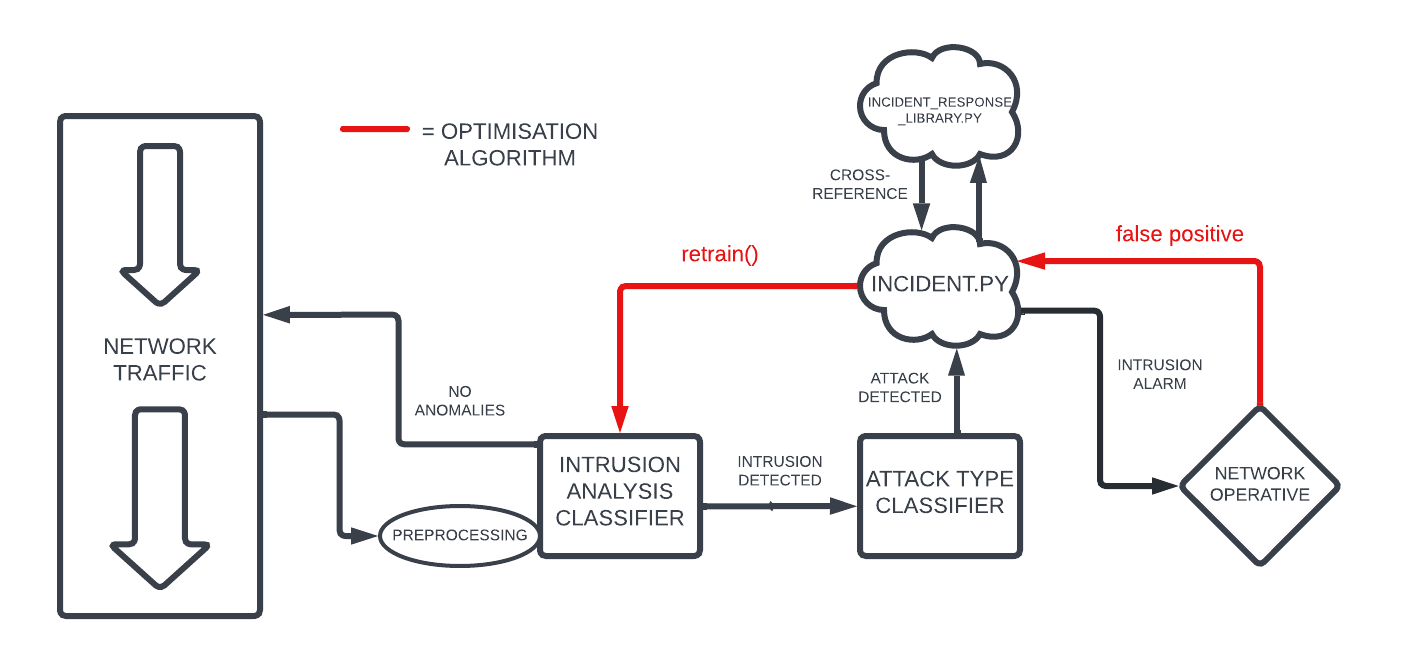

In [ ]:
#CALL SIMULATE FUNCTION#
num_data_samples = 100 #CHANGE THIS TO ADJUST SIMULATION DATASET SIZE#

simulate_nids(simulation_data[:num_data_samples])


========== INCIDENT 0:14072023192657 ==========


ATTACK OCCURING: ddos

NETWORK DATA SNAPSHOT: 
 wrong_fragment  logged_in  num_outbound_cmds    count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate
      -0.085488  -0.821249                0.0 1.007735     1.720415         1.721459     -0.40646        -0.405192      -1.472899       0.011499           -0.376389        0.721338           -1.011064               -1.126012                0.030381                    -0.472829                     -0.28065              1.736012                  1.742295             -0.422074                 -0.406815

PRESS 1 IF ATTACK IS FALSE ALARM, PRESS 0 TO CONTINUE WITH INCIDENT RESPONSE: 


SENDING DATA T